In [1]:
import pandas as pd

archivo_csv = r'C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Transporte y Logística/df_limpio_PEYA.csv'
# Mostrar todas las columnas con sus respectivos valores
pd.set_option('display.max_columns', None) 
df = pd.read_csv(archivo_csv)

print(df.head())

                                      id_pedido  id_repartidor_x  id_comercio  \
0  iSdc/QiV5eDFvPWh8CoOiQfAev9LgQFDq/hLDSP/I7U=        124406310     98613018   
1  iSdc/QiV5eDFvPWh8CoOiQfAev9LgQFDq/hLDSP/I7U=        124406310     98613018   
2  tBMHeU17rwPedjQxWV5JhFCo02OqhElPMsevJyHmxMU=         56877906    129533028   
3  mzlqOzwDoX3fv2E2uPDMIo+YgpABTzbCEWCSOJmqfk8=         70267848    121192920   
4  mzlqOzwDoX3fv2E2uPDMIo+YgpABTzbCEWCSOJmqfk8=         70267848    121192920   

              creacion_pedido        transicion  transicion_id_repartidor  \
0  2024-06-30 21:00:09.257475  courier_notified               124406310.0   
1  2024-06-30 21:00:09.257475          accepted               124406310.0   
2  2024-06-30 21:00:09.048317            queued                69517842.0   
3  2024-06-30 21:00:13.517017  courier_notified                70267848.0   
4  2024-06-30 21:00:13.517017          accepted                70267848.0   

          creacion_transicion  transicion_coordena

In [34]:
print(df.shape)

# Contar la cantidad de id_pedido únicos en el DataFrame df
cantidad_id_pedido_unicos = df['id_pedido'].nunique()

# Mostrar el resultado
print(f"Cantidad de id_pedido únicos: {cantidad_id_pedido_unicos}")

# Contar la cantidad de veces que aparece "cancelled" y "completed"
conteo_cancelled = df['transicion'].value_counts().get('cancelled', 0)
conteo_completed = df['transicion'].value_counts().get('completed', 0)

# Mostrar los resultados
print(f"Cantidad de 'cancelled': {conteo_cancelled}")
print(f"Cantidad de 'completed': {conteo_completed}")

# Contar la cantidad de id_comercio únicos
id_comercios_unicos = df['id_comercio'].nunique()

# Contar la cantidad de id_repartidor_x únicos
id_repartidor_unicos = df['id_repartidor_x'].nunique()

# Mostrar los resultados
print(f"Cantidad de id_comercios únicos: {id_comercios_unicos}")
print(f"Cantidad de id_repartidor_x únicos: {id_repartidor_unicos}")



(2486549, 44)
Cantidad de id_pedido únicos: 290692
Cantidad de 'cancelled': 1233
Cantidad de 'completed': 288926
Cantidad de id_comercios únicos: 2318
Cantidad de id_repartidor_x únicos: 5521


#### Tasa de rechazos

In [35]:
# Calcular la cantidad de registros donde 'transicion' es 'courier_notified'
total_courier_notified = (df['transicion'] == 'courier_notified').sum()

# Calcular la tasa de rechazos
tasa_rechazos = (df['pre_accept_undispatch'] > 0).sum() / total_courier_notified

# Mostrar el resultado
print(f"La tasa de rechazos es del: {tasa_rechazos}")

La tasa de rechazos es del: 0.3123051091388822


#### Tasa de reasignacion

In [36]:
# Calcular la cantidad de registros donde 'transicion' es 'accepted'
total_accepted = (df['transicion'] == 'accepted').sum()

# Calcular la tasa de reasignaciones
tasa_reasignaciones = (df['post_accept_undispatchs'] > 0).sum() / total_accepted

# Mostrar el resultado
print(f"La tasa de reasignaciones es: {tasa_reasignaciones}")

La tasa de reasignaciones es: 0.04528298167985573


#### Cantidad de rechazos por pedido

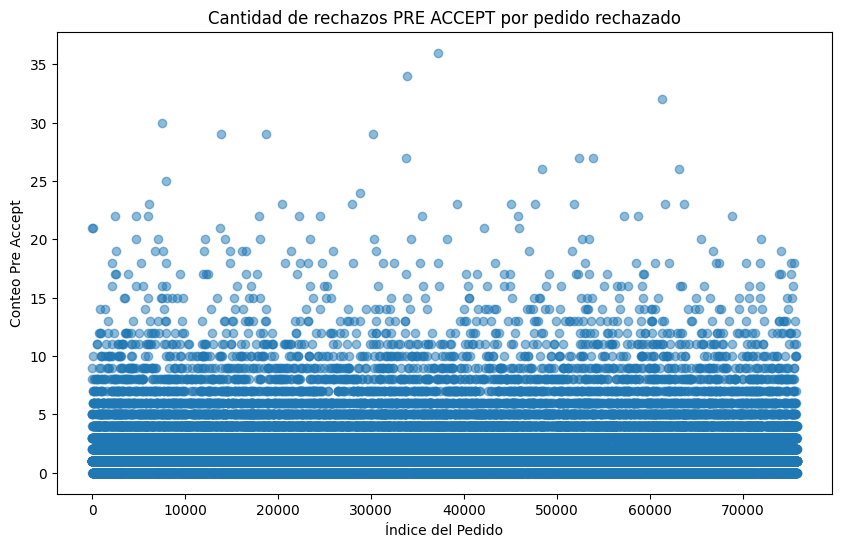

In [39]:
# Filtrar los registros donde 'pre_accept_undispatch' o 'post_accept_undispatchs' sean iguales a 1
filtro = df[(df['pre_accept_undispatch'] == 1) | (df['post_accept_undispatchs'] == 1)]

# Contar por 'id_pedido' la cantidad de veces que el pedido tiene un 1 en 'pre_accept_undispatch'
conteo_pre_accept = filtro.groupby('id_pedido')['pre_accept_undispatch'].sum().reset_index(name='conteo_pre_accept')

# Contar por 'id_pedido' la cantidad de veces que el pedido tiene un 1 en 'post_accept_undispatchs'
conteo_post_accept = filtro.groupby('id_pedido')['post_accept_undispatchs'].sum().reset_index(name='conteo_post_accept')

# Unir ambos conteos en una misma tabla
conteo_combinado = pd.merge(conteo_pre_accept, conteo_post_accept, on='id_pedido', how='outer').fillna(0)

# Ordenar la tabla en orden descendente por 'conteo_pre_accept'
conteo_combinado_ordenado = conteo_combinado.sort_values(by='conteo_pre_accept', ascending=False)

import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Índice del pedido en el eje x y 'conteo_pre_accept' en el eje y
plt.scatter(conteo_combinado_ordenado.index, conteo_combinado_ordenado['conteo_pre_accept'], alpha=0.5)

# Títulos y etiquetas
plt.title('Cantidad de rechazos PRE ACCEPT por pedido rechazado')
plt.xlabel('Índice del Pedido')
plt.ylabel('Conteo Pre Accept')

# Mostrar el gráfico
plt.show()

In [29]:
# Generar un resumen estadístico de la columna 'conteo_pre_accept'
resumen_estadistico = conteo_combinado_ordenado['conteo_pre_accept'].describe()

# Mostrar el resumen estadístico
print(resumen_estadistico)


count    81107.000000
mean         1.887913
std          1.951784
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: conteo_pre_accept, dtype: float64


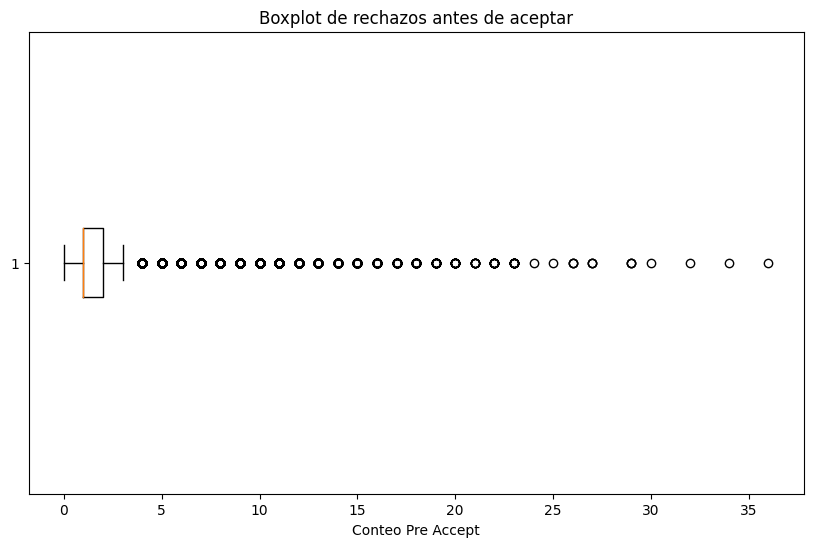

In [30]:
import matplotlib.pyplot as plt

# Crear un gráfico de caja (boxplot) para visualizar los outliers de 'conteo_pre_accept'
plt.figure(figsize=(10, 6))

# Generar el boxplot
plt.boxplot(conteo_combinado_ordenado['conteo_pre_accept'], vert=False)

# Títulos y etiquetas
plt.title('Boxplot de rechazos antes de aceptar')
plt.xlabel('Conteo Pre Accept')

# Mostrar el gráfico
plt.show()

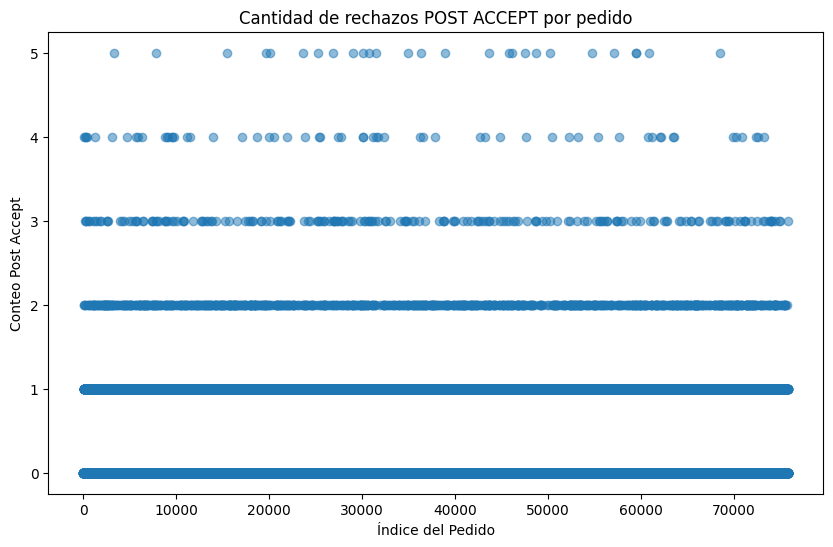

In [40]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Índice del pedido en el eje x y 'conteo_pre_accept' en el eje y
plt.scatter(conteo_combinado_ordenado.index, conteo_combinado_ordenado['conteo_post_accept'], alpha=0.5)

# Títulos y etiquetas
plt.title('Cantidad de rechazos POST ACCEPT por pedido')
plt.xlabel('Índice del Pedido')
plt.ylabel('Conteo Post Accept')

# Mostrar el gráfico
plt.show()

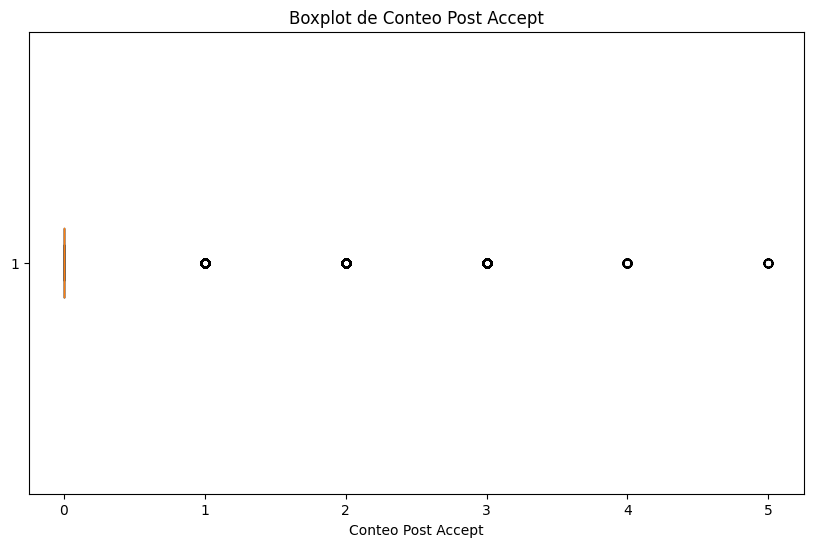

In [41]:
import matplotlib.pyplot as plt

# Crear un gráfico de caja (boxplot) para visualizar los outliers de 'conteo_pre_accept'
plt.figure(figsize=(10, 6))

# Generar el boxplot
plt.boxplot(conteo_combinado_ordenado['conteo_post_accept'], vert=False)

# Títulos y etiquetas
plt.title('Boxplot de Conteo Post Accept')
plt.xlabel('Conteo Post Accept')

# Mostrar el gráfico
plt.show()

In [38]:
# Generar un resumen estadístico de la columna 'conteo_pre_accept'
resumen_estadistico = conteo_combinado_ordenado['conteo_post_accept'].describe()

# Mostrar el resumen estadístico
print(resumen_estadistico)

count    81107.000000
mean         0.177383
std          0.450507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: conteo_post_accept, dtype: float64


In [44]:
print(df.head())

                                      id_pedido  id_repartidor_x  id_comercio  \
0  iSdc/QiV5eDFvPWh8CoOiQfAev9LgQFDq/hLDSP/I7U=        124406310     98613018   
1  iSdc/QiV5eDFvPWh8CoOiQfAev9LgQFDq/hLDSP/I7U=        124406310     98613018   
2  tBMHeU17rwPedjQxWV5JhFCo02OqhElPMsevJyHmxMU=         56877906    129533028   
5  fDXBrgn6jpBODCSry3VD3AupLR+lTdazHOTovR6bGgM=         54946002      9375204   
6  BuaZjYCMYgGbV95c9CRJ566sADgYx7xbrR0mYSVJH3Q=        101742816     17556900   

             creacion_pedido        transicion  transicion_id_repartidor  \
0 2024-06-30 21:00:09.257475  courier_notified               124406310.0   
1 2024-06-30 21:00:09.257475          accepted               124406310.0   
2 2024-06-30 21:00:09.048317            queued                69517842.0   
5 2024-06-30 21:02:07.051458  courier_notified                54946002.0   
6 2024-06-30 21:01:52.102755  courier_notified               101742816.0   

          creacion_transicion  transicion_coordenada_lat

#### Análisis por día de semana 

C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2987873809.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[67243.4 59100.4 82093.8 81130.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cantidad_pedidos_por_dia[['Sunday', 'Monday', 'Tuesday', 'Wednesday']] /= 5
C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2987873809.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cantidad_pedidos_por_dia.index, y=cantidad_pedidos_por_dia.values, palette=colores_barras)
C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2987873809.py:28: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=cantidad_pedidos_por_dia.index, y=

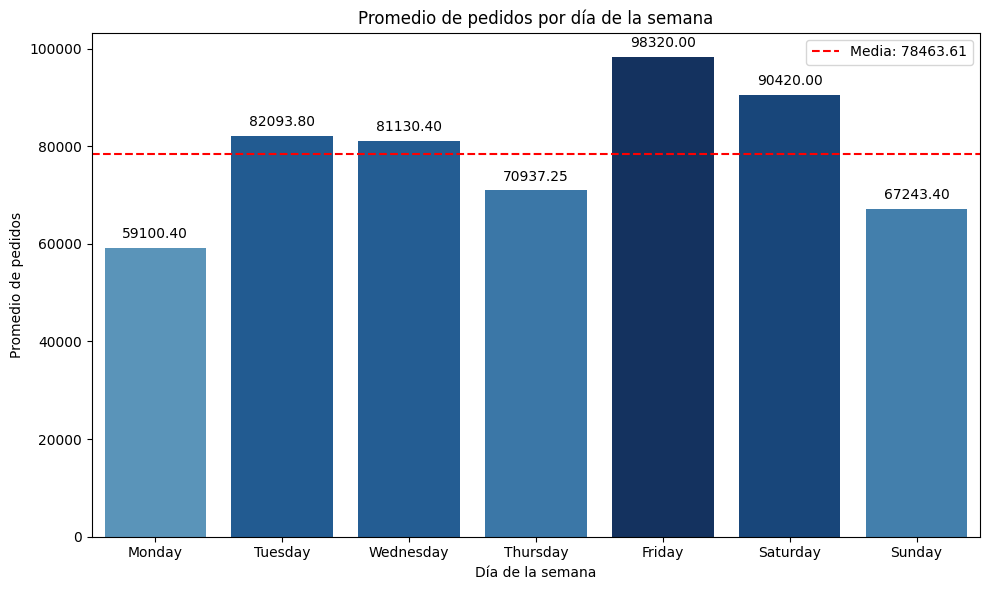

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que 'creacion_pedido' esté en formato datetime
df['creacion_pedido'] = pd.to_datetime(df['creacion_pedido'])

# Extraer el día de la semana (en formato de nombre completo)
df['dia_semana'] = df['creacion_pedido'].dt.day_name()

# Contar la cantidad de pedidos por día de la semana
cantidad_pedidos_por_dia = df['dia_semana'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Dividir las cantidades correspondientes por 5 para los días de Domingo a Miércoles y por 4 para Jueves a Sábado
cantidad_pedidos_por_dia[['Sunday', 'Monday', 'Tuesday', 'Wednesday']] /= 5
cantidad_pedidos_por_dia[['Thursday', 'Friday', 'Saturday']] /= 4

# Calcular la media del promedio de pedidos
media_promedio_pedidos = cantidad_pedidos_por_dia.mean()

# Crear una paleta de colores basada en la intensidad
colores = sns.color_palette("Blues", as_cmap=True)  # Usamos una paleta de colores
valores_normalizados = cantidad_pedidos_por_dia.values / cantidad_pedidos_por_dia.max()  # Normalizar valores para la intensidad
colores_barras = colores(valores_normalizados)  # Obtener colores basados en la intensidad

# Crear el histograma ajustado
plt.figure(figsize=(10, 6))
sns.barplot(x=cantidad_pedidos_por_dia.index, y=cantidad_pedidos_por_dia.values, palette=colores_barras)

# Agregar la línea horizontal punteada roja en la media del promedio
plt.axhline(media_promedio_pedidos, color='red', linestyle='--', label=f'Media: {media_promedio_pedidos:.2f}')

# Establecer el título y los labels de los ejes
plt.title('Promedio de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio de pedidos')

# Mostrar los valores numéricos encima de las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar leyenda para la media
plt.legend()

# Ajustar el gráfico para que quede bien visualmente
plt.tight_layout()

# Mostrar el gráfico
plt.show()


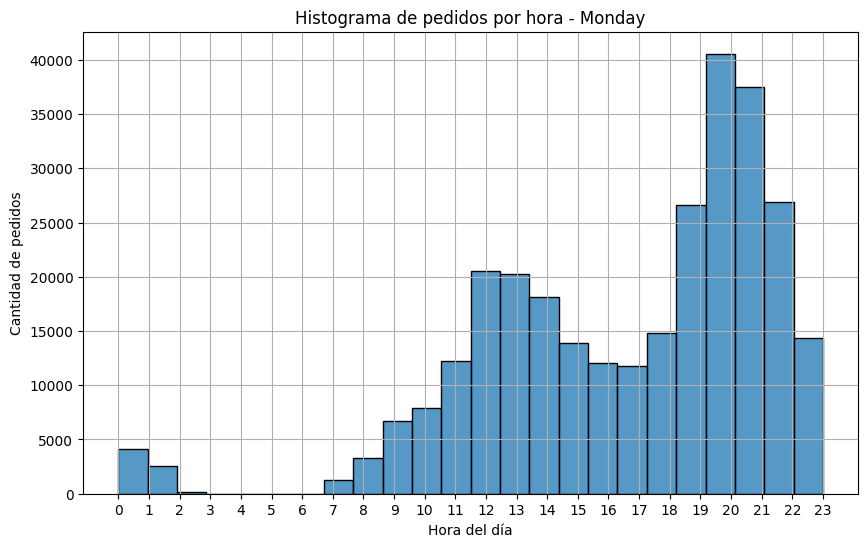

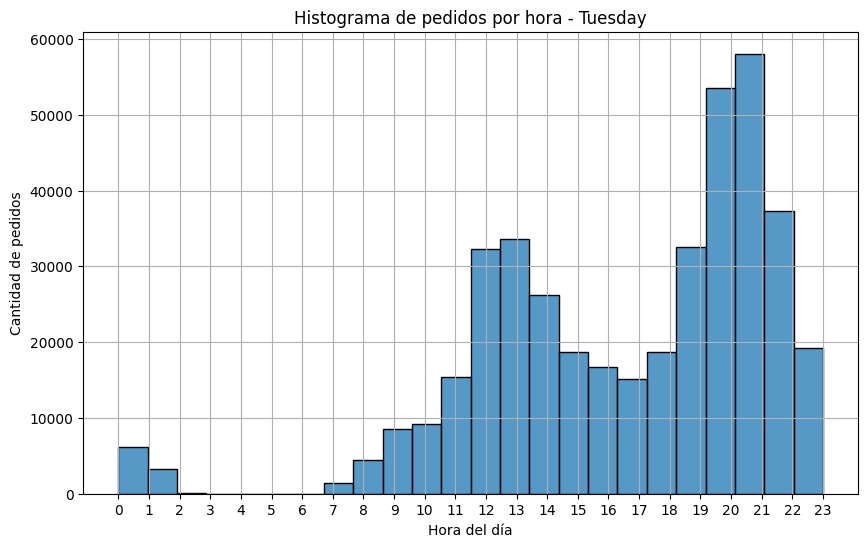

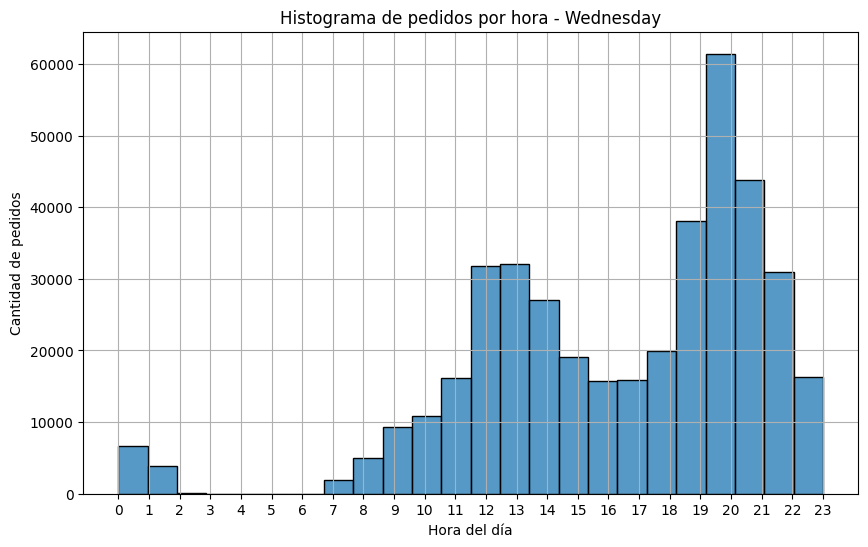

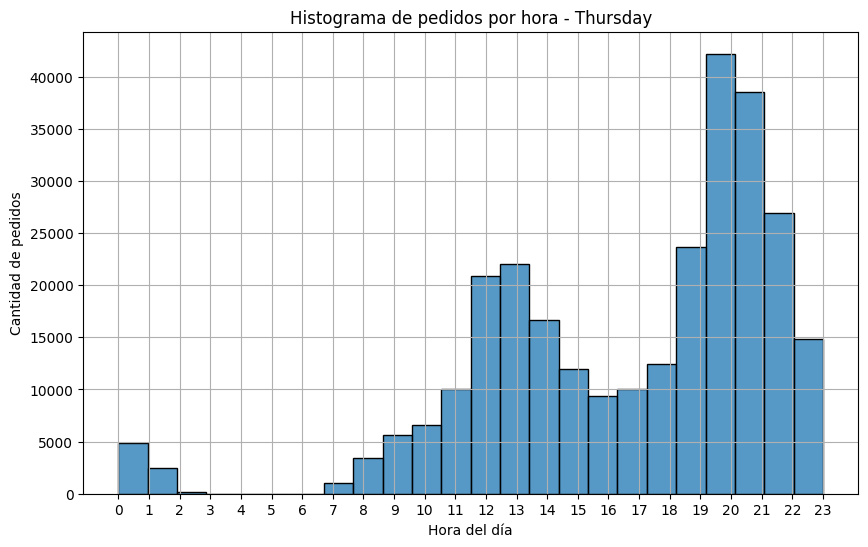

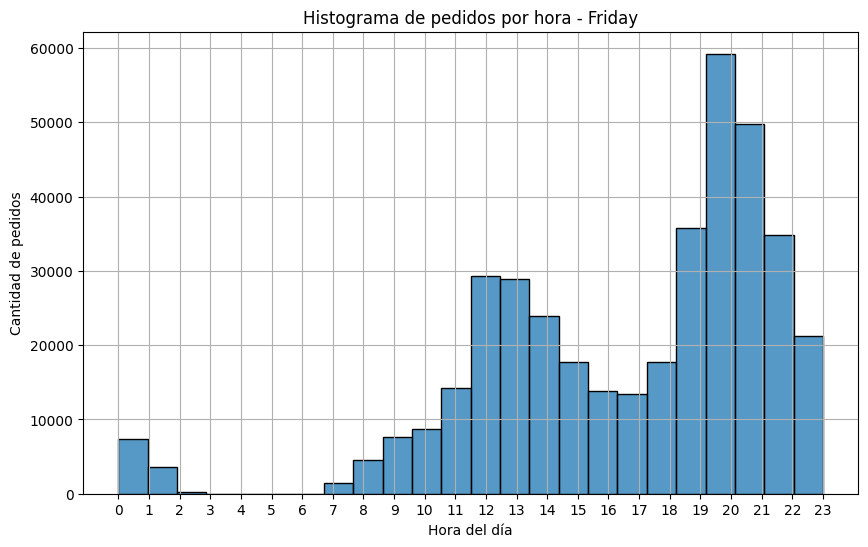

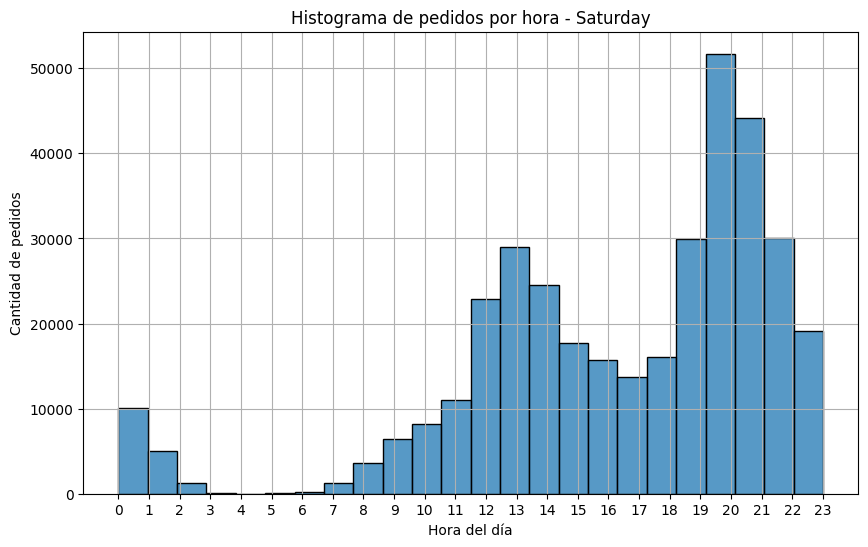

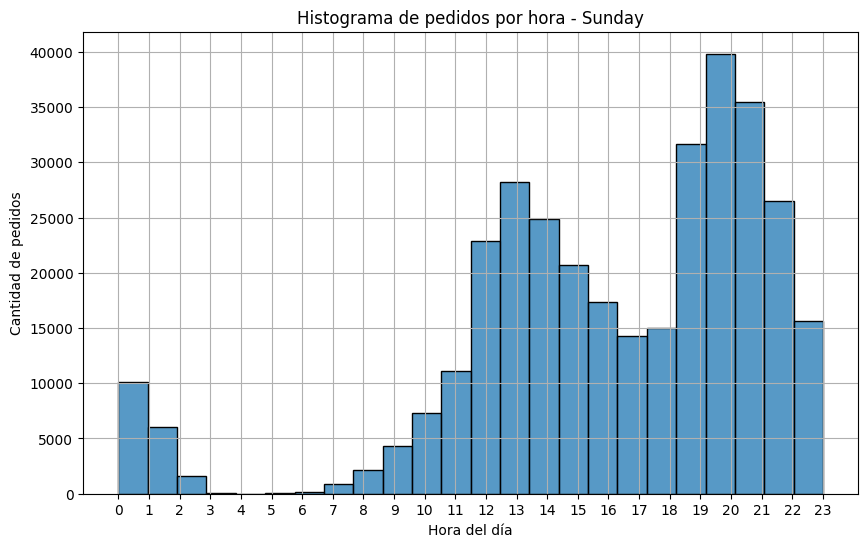

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que 'creacion_pedido' está en formato datetime
df['creacion_pedido'] = pd.to_datetime(df['creacion_pedido'])

# Extraer el día de la semana (0 = lunes, 6 = domingo) y la hora
df['dia_semana'] = df['creacion_pedido'].dt.day_name()  # Esto devuelve el nombre del día de la semana
df['hora'] = df['creacion_pedido'].dt.hour  # Esto devuelve la hora (0-23)

# Lista de días en orden
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear histogramas para cada día de la semana
for dia in dias_semana:
    # Filtrar los pedidos por día de la semana
    df_dia = df[df['dia_semana'] == dia]
    
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(df_dia['hora'], bins=24, kde=False)
    
    # Establecer títulos y etiquetas
    plt.title(f'Histograma de pedidos por hora - {dia}')
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de pedidos')
    plt.xticks(range(0, 24))  # Mostrar todas las horas en el eje x
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()


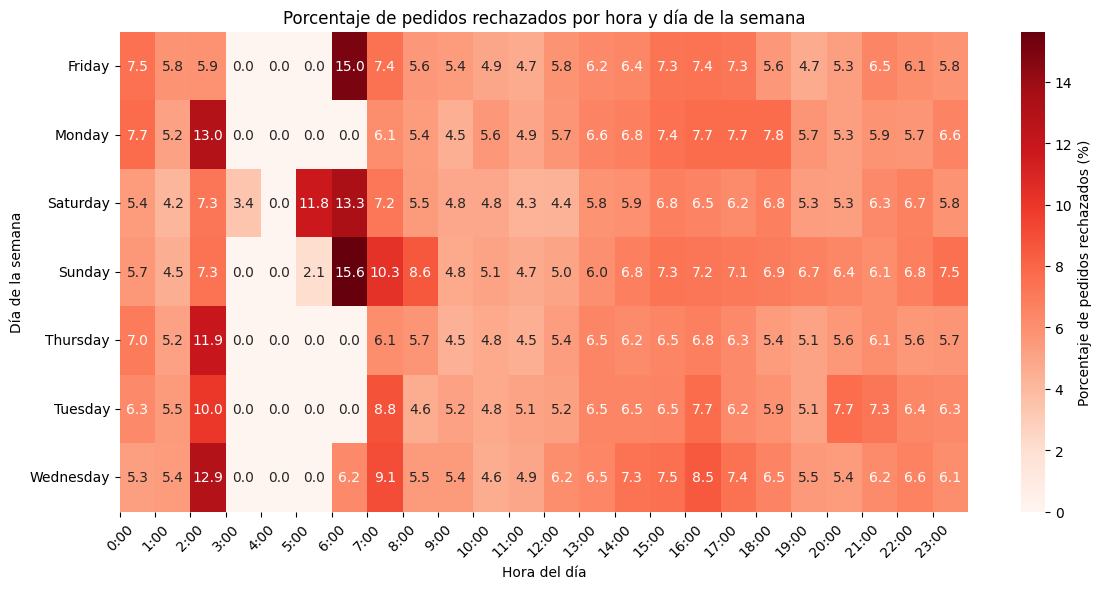

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que 'creacion_pedido' está en formato datetime
df['creacion_pedido'] = pd.to_datetime(df['creacion_pedido'])

# Extraer el día de la semana y la hora
df['dia_semana'] = df['creacion_pedido'].dt.day_name()  # Esto devuelve el nombre del día de la semana
df['hora'] = df['creacion_pedido'].dt.hour  # Esto devuelve la hora (0-23)

# Crear una tabla cruzada con el número total de pedidos por día y hora
total_pedidos = pd.crosstab(df['dia_semana'], df['hora'])

# Crear una tabla cruzada con el número de pedidos rechazados por día y hora
rechazos = pd.crosstab(df[df['rechazo'] == 1]['dia_semana'], df['hora'])

# Calcular el porcentaje de pedidos rechazados
porcentaje_rechazados = (rechazos / total_pedidos * 100).fillna(0)

# Crear un mapa de calor para mostrar los porcentajes de pedidos rechazados
plt.figure(figsize=(12, 6))

# Cambiar la paleta de colores a rojo
sns.heatmap(porcentaje_rechazados, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Porcentaje de pedidos rechazados (%)'})

# Establecer el título y los labels de los ejes
plt.title('Porcentaje de pedidos rechazados por hora y día de la semana')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')

# Definir los labels de las horas en el eje X (de 0 a 23 horas) y rotarlos
horas = [f'{h}:00' for h in range(24)]
plt.xticks(ticks=range(24), labels=horas, rotation=45)

# Ajustar el gráfico para que quede bien visualmente
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Comparar medias entre pedidos aceptados y rechazados

C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2613335370.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='tiempo_hasta_entrega', data=df_comparacion, palette="Set2")


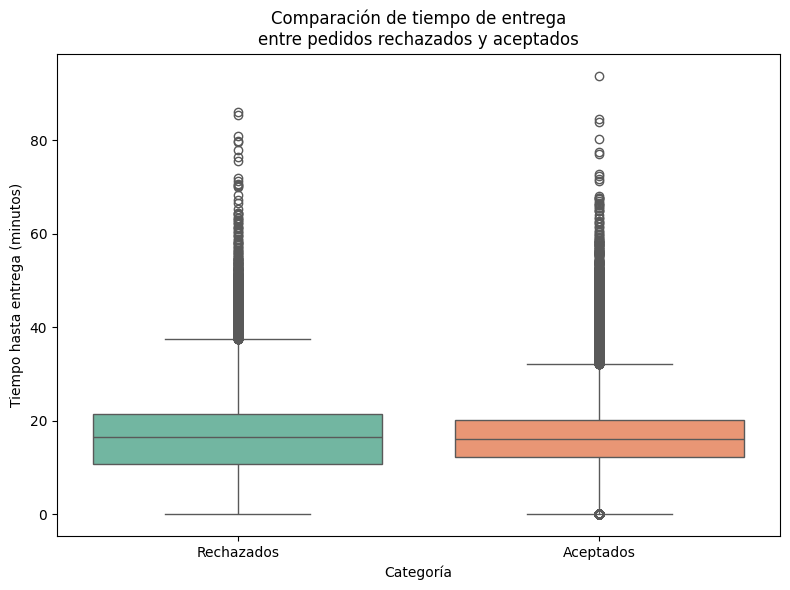

Resultado del test ANOVA:
F-value: 68.3827
P-value: 0.0000
Conclusión: Hay una diferencia significativa en el tiempo de entrega entre pedidos rechazados y aceptados.

Media del tiempo hasta entrega para pedidos rechazados: 15.99 minutos
Media del tiempo hasta entrega para pedidos aceptados: 16.18 minutos


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Filtrar los datos para rechazos y aceptados
df_rechazados = df[df['rechazo'] == 1]
df_aceptados = df[df['aceptado'] == 1]

# Crear un DataFrame con ambas categorías para poder graficarlas juntas
df_comparacion = pd.DataFrame({
    'Categoria': ['Rechazados'] * len(df_rechazados) + ['Aceptados'] * len(df_aceptados),
    'tiempo_hasta_entrega': pd.concat([df_rechazados['tiempo_hasta_entrega'], df_aceptados['tiempo_hasta_entrega']])
})

# Crear el boxplot para comparar las distribuciones
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria', y='tiempo_hasta_entrega', data=df_comparacion, palette="Set2")

# Agregar el título y etiquetas
plt.title('Comparación de tiempo de entrega\nentre pedidos rechazados y aceptados')
plt.xlabel('Categoría')
plt.ylabel('Tiempo hasta entrega (minutos)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Realizar el test de ANOVA (Análisis de Varianza) para comparar las medias
fvalue, pvalue = stats.f_oneway(df_rechazados['tiempo_hasta_entrega'], df_aceptados['tiempo_hasta_entrega'])

# Mostrar los resultados del test de ANOVA
print(f"Resultado del test ANOVA:")
print(f"F-value: {fvalue:.4f}")
print(f"P-value: {pvalue:.4f}")

# Interpretar los resultados del p-valor
if pvalue < 0.05:
    print("Conclusión: Hay una diferencia significativa en el tiempo de entrega entre pedidos rechazados y aceptados.")
else:
    print("Conclusión: No hay una diferencia significativa en el tiempo de entrega entre pedidos rechazados y aceptados.")

# Calcular y mostrar las medias de cada grupo
media_rechazados = df_rechazados['tiempo_hasta_entrega'].mean()
media_aceptados = df_aceptados['tiempo_hasta_entrega'].mean()

print(f"\nMedia del tiempo hasta entrega para pedidos rechazados: {media_rechazados:.2f} minutos")
print(f"Media del tiempo hasta entrega para pedidos aceptados: {media_aceptados:.2f} minutos")


C:\Users\paula\AppData\Local\Temp\ipykernel_20192\4102541772.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='distancia_pedido_total', data=df_comparacion, palette="Set2")


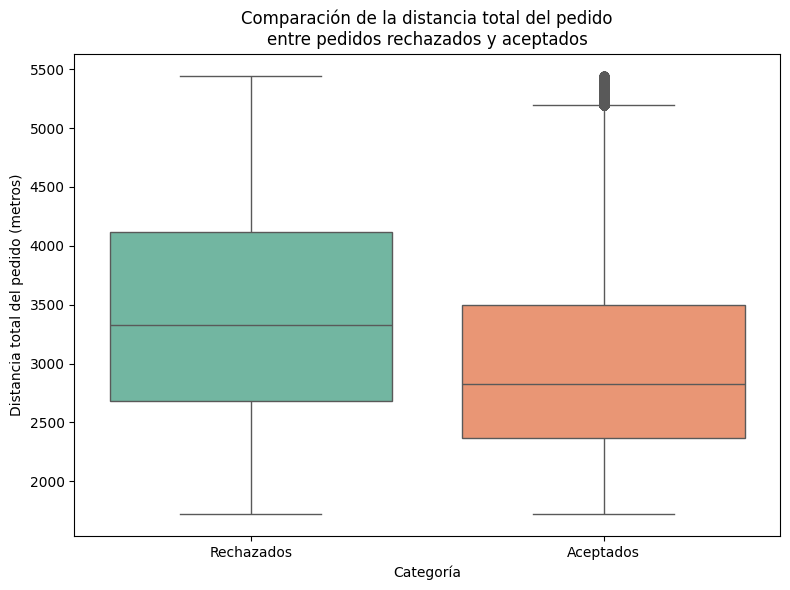

Resultado del test ANOVA:
F-value: 23738.2433
P-value: 0.0000
Conclusión: Hay una diferencia significativa en la distancia total del pedido entre pedidos rechazados y aceptados.

Media de la distancia total del pedido para pedidos rechazados: 3428.44 metros
Media de la distancia total del pedido para pedidos aceptados: 3012.99 metros


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Filtrar los datos para rechazos y aceptados
df_rechazados = df[df['rechazo'] == 1]
df_aceptados = df[df['aceptado'] == 1]

# Crear un DataFrame con ambas categorías para poder graficarlas juntas
df_comparacion = pd.DataFrame({
    'Categoria': ['Rechazados'] * len(df_rechazados) + ['Aceptados'] * len(df_aceptados),
    'distancia_pedido_total': pd.concat([df_rechazados['distancia_pedido_total'], df_aceptados['distancia_pedido_total']])
})

# Crear el boxplot para comparar las distribuciones
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria', y='distancia_pedido_total', data=df_comparacion, palette="Set2")

# Agregar el título y etiquetas
plt.title('Comparación de la distancia total del pedido\nentre pedidos rechazados y aceptados')
plt.xlabel('Categoría')
plt.ylabel('Distancia total del pedido (metros)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Realizar el test de ANOVA (Análisis de Varianza) para comparar las medias
fvalue, pvalue = stats.f_oneway(df_rechazados['distancia_pedido_total'], df_aceptados['distancia_pedido_total'])

# Mostrar los resultados del test de ANOVA
print(f"Resultado del test ANOVA:")
print(f"F-value: {fvalue:.4f}")
print(f"P-value: {pvalue:.4f}")

# Interpretar los resultados del p-valor
if pvalue < 0.05:
    print("Conclusión: Hay una diferencia significativa en la distancia total del pedido entre pedidos rechazados y aceptados.")
else:
    print("Conclusión: No hay una diferencia significativa en la distancia total del pedido entre pedidos rechazados y aceptados.")

# Calcular y mostrar las medias de cada grupo
media_rechazados = df_rechazados['distancia_pedido_total'].mean()
media_aceptados = df_aceptados['distancia_pedido_total'].mean()

print(f"\nMedia de la distancia total del pedido para pedidos rechazados: {media_rechazados:.2f} metros")
print(f"Media de la distancia total del pedido para pedidos aceptados: {media_aceptados:.2f} metros")


C:\Users\paula\AppData\Local\Temp\ipykernel_20192\522125766.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='pago_total', data=df_comparacion_pagos, palette="Set2")


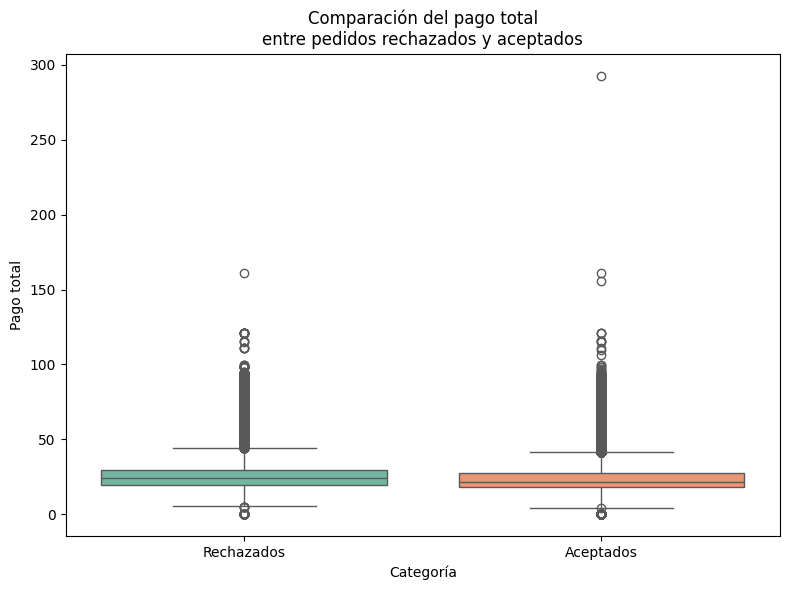

Resultado del test ANOVA:
F-value: 4262.3536
P-value: 0.0000
Conclusión: Hay una diferencia significativa en los pagos entre pedidos rechazados y aceptados.

Media del pago total para pedidos rechazados: 25.87
Media del pago total para pedidos aceptados: 24.07


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Filtrar los datos para rechazos y aceptados
df_rechazados = df[df['rechazo'] == 1]
df_aceptados = df[df['aceptado'] == 1]

# Crear un DataFrame con ambas categorías para poder graficarlas juntas
df_comparacion_pagos = pd.DataFrame({
    'Categoria': ['Rechazados'] * len(df_rechazados) + ['Aceptados'] * len(df_aceptados),
    'pago_total': pd.concat([df_rechazados['pago_base'] + df_rechazados['pago_rendimiento'] + df_rechazados['pago_incentivos'],
                             df_aceptados['pago_base'] + df_aceptados['pago_rendimiento'] + df_aceptados['pago_incentivos']])
})

# Crear el boxplot para comparar las distribuciones de los pagos
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria', y='pago_total', data=df_comparacion_pagos, palette="Set2")

# Agregar el título y etiquetas
plt.title('Comparación del pago total\nentre pedidos rechazados y aceptados')
plt.xlabel('Categoría')
plt.ylabel('Pago total')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Realizar el test de ANOVA (Análisis de Varianza) para comparar las medias
fvalue, pvalue = stats.f_oneway(df_rechazados['pago_base'] + df_rechazados['pago_rendimiento'] + df_rechazados['pago_incentivos'], 
                                df_aceptados['pago_base'] + df_aceptados['pago_rendimiento'] + df_aceptados['pago_incentivos'])

# Mostrar los resultados del test de ANOVA
print(f"Resultado del test ANOVA:")
print(f"F-value: {fvalue:.4f}")
print(f"P-value: {pvalue:.4f}")

# Interpretar los resultados del p-valor
if pvalue < 0.05:
    print("Conclusión: Hay una diferencia significativa en los pagos entre pedidos rechazados y aceptados.")
else:
    print("Conclusión: No hay una diferencia significativa en los pagos entre pedidos rechazados y aceptados.")

# Calcular y mostrar las medias de cada grupo
media_rechazados_pago = (df_rechazados['pago_base'] + df_rechazados['pago_rendimiento'] + df_rechazados['pago_incentivos']).mean()
media_aceptados_pago = (df_aceptados['pago_base'] + df_aceptados['pago_rendimiento'] + df_aceptados['pago_incentivos']).mean()

print(f"\nMedia del pago total para pedidos rechazados: {media_rechazados_pago:.2f}")
print(f"Media del pago total para pedidos aceptados: {media_aceptados_pago:.2f}")


In [80]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Calcular el pago total (base + rendimiento + incentivos)
df['pago_total'] = df['pago_base'] + df['pago_rendimiento'] + df['pago_incentivos']

# Crear una variable binaria para la regresión logística (1 = aceptado, 0 = rechazado)
df['aceptado_binario'] = df['aceptado'].apply(lambda x: 1 if x == 1 else 0)

# Definir la variable dependiente (si fue aceptado o no)
y = df['aceptado_binario']

# Definir las variables independientes
X = df[['pago_total', 'tiempo_aceptacion_orden', 'distancia_repartidor_comercio', 'distancia_pedido_total', 
        'tiempo_hasta_entrega', 'tasa_aceptacion', 'tasa_cancelacion', 'pedidos_entregados', 
        'rating', 'espera_en_vendor', 'tipo_condition']]

# Agregar una constante para la regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
modelo_logit = sm.Logit(y, X)
resultado = modelo_logit.fit()

# Imprimir el resumen del modelo
print(resultado.summary())

# Interpretar los resultados
odds_ratios = pd.DataFrame({
    "Coeficiente": resultado.params,
    "Odds Ratio": np.exp(resultado.params)
})

print("\nOdds Ratios:")
print(odds_ratios)

# Conclusión sobre la influencia de las variables en la aceptación de pedidos
variables_significativas = resultado.pvalues[resultado.pvalues < 0.05]
print(f"\nVariables con influencia significativa (p < 0.05):")
print(variables_significativas)


Optimization terminated successfully.
         Current function value: 0.346993
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       aceptado_binario   No. Observations:              2486549
Model:                          Logit   Df Residuals:                  2486537
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.06655
Time:                        17:19:25   Log-Likelihood:            -8.6282e+05
converged:                       True   LL-Null:                   -9.2433e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.7262      0.588     -2.938      0.

#### Análisis del clima

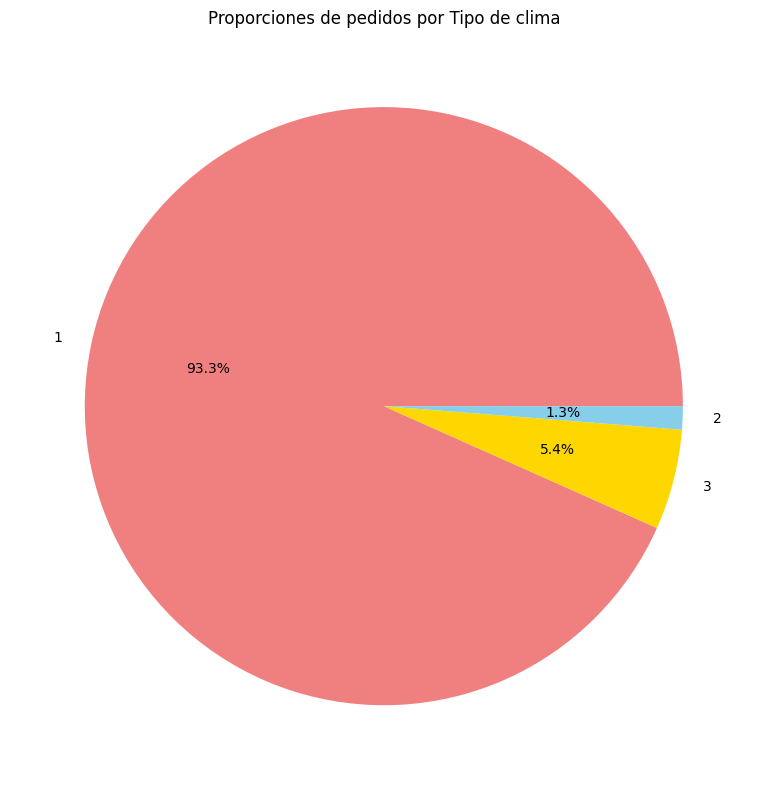

In [55]:
import matplotlib.pyplot as plt

# Obtener el primer registro de cada id_pedido único
primer_registro_por_pedido = df.drop_duplicates(subset='id_pedido', keep='first')

# Calcular la proporción de cada tipo_condition en los primeros registros
proporciones_tipo_condition = primer_registro_por_pedido['tipo_condition'].value_counts(normalize=True)

# Crear el gráfico de tortas
plt.figure(figsize=(8, 8))
plt.pie(proporciones_tipo_condition, labels=proporciones_tipo_condition.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'skyblue'])

# Agregar un título
plt.title('Proporciones de pedidos por Tipo de clima')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Análisis por comercio

In [58]:
# Agrupar por 'id_comercio' (si es que ese es el nombre correcto) y calcular la cantidad de rechazos (rechazo = 1)
rechazos_por_comercio = df[df['rechazo'] == 1].groupby('id_comercio').size().reset_index(name='cantidad_rechazos')

# Ordenar por cantidad de rechazos y seleccionar el top 10
top_10_comercios_rechazos = rechazos_por_comercio.sort_values(by='cantidad_rechazos', ascending=False).head(10)

# Mostrar los resultados
print(top_10_comercios_rechazos)


      id_comercio  cantidad_rechazos
1360     91874316               3311
488      36631356               2374
679      42323352               2270
466      35333616               1384
1474     99145014               1256
350      30918720               1087
481      36220104               1067
1814    116772606                936
163      14138916                774
1309     86846670                755


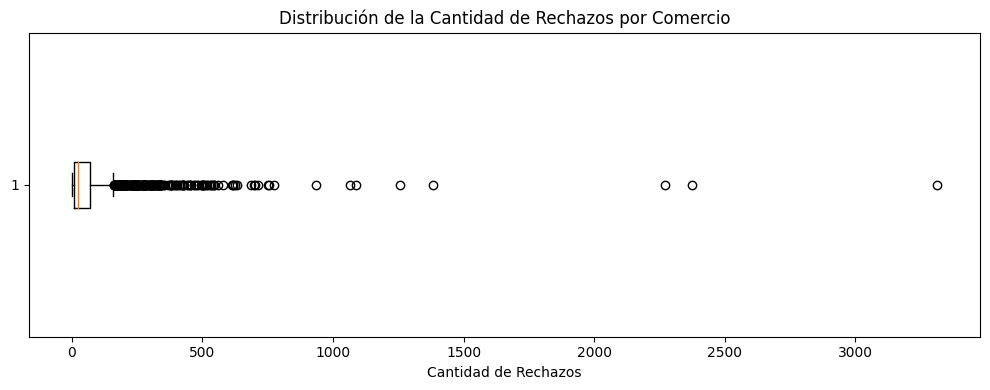

In [62]:
# Asegurarse de que los rechazos y la columna 'id_comercio' están bien definidos
rechazos_por_comercio = df[df['rechazo'] == 1].groupby('id_comercio').size().reset_index(name='cantidad_rechazos')

# Crear el boxplot ajustando el espacio en blanco
plt.figure(figsize=(10, 4))  # Tamaño ajustado
plt.boxplot(rechazos_por_comercio['cantidad_rechazos'], vert=False)
plt.title('Distribución de la Cantidad de Rechazos por Comercio')
plt.xlabel('Cantidad de Rechazos')

# Ajustar el gráfico para reducir el espacio en blanco
plt.tight_layout()
plt.show()


In [63]:
# Generar un resumen estadístico del número de rechazos por comercio
resumen_estadistico = rechazos_por_comercio['cantidad_rechazos'].describe()

# Identificar los outliers usando el criterio del rango intercuartílico (IQR)
q1 = rechazos_por_comercio['cantidad_rechazos'].quantile(0.25)
q3 = rechazos_por_comercio['cantidad_rechazos'].quantile(0.75)
iqr = q3 - q1

# Definir los límites para los outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Contar la cantidad de outliers
outliers = rechazos_por_comercio[(rechazos_por_comercio['cantidad_rechazos'] < limite_inferior) | 
                                 (rechazos_por_comercio['cantidad_rechazos'] > limite_superior)]

cantidad_outliers = outliers.shape[0]

# Mostrar el resumen estadístico y la cantidad de outliers
resumen_estadistico, cantidad_outliers

(count    2218.000000
 mean       68.438683
 std       147.647055
 min         1.000000
 25%         9.000000
 50%        26.000000
 75%        70.000000
 max      3311.000000
 Name: cantidad_rechazos, dtype: float64,
 237)

C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2269847509.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_outliers['tiempo_entrega'] = (pd.to_datetime(pedidos_outliers['tiempo_estimado_entrega']) - pd.to_datetime(pedidos_outliers['creacion_pedido'])).dt.total_seconds() / 60
C:\Users\paula\AppData\Local\Temp\ipykernel_20192\2269847509.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_no_outliers['tiempo_entrega'] = (pd.to_datetime(pedidos_no_outliers['tiempo_estimado_entrega']) - p

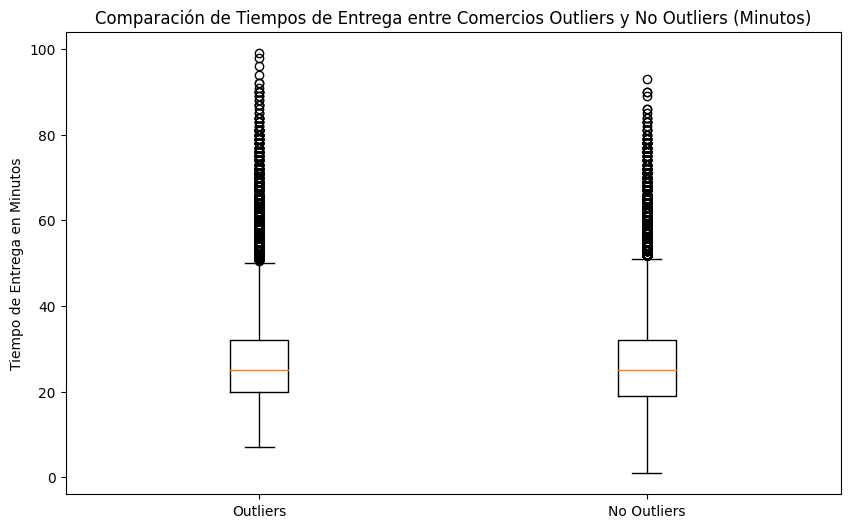

Estadístico F: 290.0903769295411
Valor p: 5.111410243409528e-65
Las medias son estadísticamente diferentes (p < 0.05).
Media de comercios outliers: 27.12 minutos
Media de comercios no outliers: 26.46 minutos
La media del tiempo de entrega de los comercios no outliers es menor que la de los outliers.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Agrupar los datos por 'id_comercio' y calcular la cantidad de rechazos (rechazo = 1)
rechazos_por_comercio = df[df['rechazo'] == 1].groupby('id_comercio').size().reset_index(name='cantidad_rechazos')

# Identificar los outliers usando el criterio del rango intercuartílico (IQR)
q1 = rechazos_por_comercio['cantidad_rechazos'].quantile(0.25)
q3 = rechazos_por_comercio['cantidad_rechazos'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Filtrar los comercios que son outliers y no outliers
comercios_outliers = rechazos_por_comercio[rechazos_por_comercio['cantidad_rechazos'] > limite_superior]['id_comercio']
comercios_no_outliers = rechazos_por_comercio[rechazos_por_comercio['cantidad_rechazos'] <= limite_superior]['id_comercio']

# Filtrar los pedidos correspondientes a los comercios outliers y no outliers
pedidos_outliers = df[df['id_comercio'].isin(comercios_outliers)]
pedidos_no_outliers = df[df['id_comercio'].isin(comercios_no_outliers)]

# Calcular el tiempo promedio de entrega para comercios outliers y no outliers en minutos
pedidos_outliers['tiempo_entrega'] = (pd.to_datetime(pedidos_outliers['tiempo_estimado_entrega']) - pd.to_datetime(pedidos_outliers['creacion_pedido'])).dt.total_seconds() / 60
pedidos_no_outliers['tiempo_entrega'] = (pd.to_datetime(pedidos_no_outliers['tiempo_estimado_entrega']) - pd.to_datetime(pedidos_no_outliers['creacion_pedido'])).dt.total_seconds() / 60

# Calcular el promedio por id_pedido
tiempo_promedio_entrega_outliers = pedidos_outliers.groupby('id_pedido')['tiempo_entrega'].mean()
tiempo_promedio_entrega_no_outliers = pedidos_no_outliers.groupby('id_pedido')['tiempo_entrega'].mean()

# Crear el boxplot para comparar el tiempo promedio de entrega entre comercios outliers y no outliers
plt.figure(figsize=(10, 6))
plt.boxplot([tiempo_promedio_entrega_outliers, tiempo_promedio_entrega_no_outliers], labels=['Outliers', 'No Outliers'])
plt.title('Comparación de Tiempos de Entrega entre Comercios Outliers y No Outliers (Minutos)')
plt.ylabel('Tiempo de Entrega en Minutos')
plt.show()

# Realizar el test ANOVA para comparar las medias entre los tiempos de entrega de comercios outliers y no outliers
anova_resultado = stats.f_oneway(tiempo_promedio_entrega_outliers, tiempo_promedio_entrega_no_outliers)

# Imprimir los resultados del test ANOVA
print(f"Estadístico F: {anova_resultado.statistic}")
print(f"Valor p: {anova_resultado.pvalue}")

# Determinar si las medias son estadísticamente diferentes
if anova_resultado.pvalue < 0.05:
    print("Las medias son estadísticamente diferentes (p < 0.05).")
    
    # Comparar las medias para ver cuál es menor
    media_outliers = tiempo_promedio_entrega_outliers.mean()
    media_no_outliers = tiempo_promedio_entrega_no_outliers.mean()
    
    print(f"Media de comercios outliers: {media_outliers:.2f} minutos")
    print(f"Media de comercios no outliers: {media_no_outliers:.2f} minutos")
    
    if media_outliers < media_no_outliers:
        print("La media del tiempo de entrega de los comercios outliers es menor que la de los no outliers.")
    else:
        print("La media del tiempo de entrega de los comercios no outliers es menor que la de los outliers.")
else:
    print("No hay evidencia suficiente para afirmar que las medias son diferentes (p >= 0.05).")


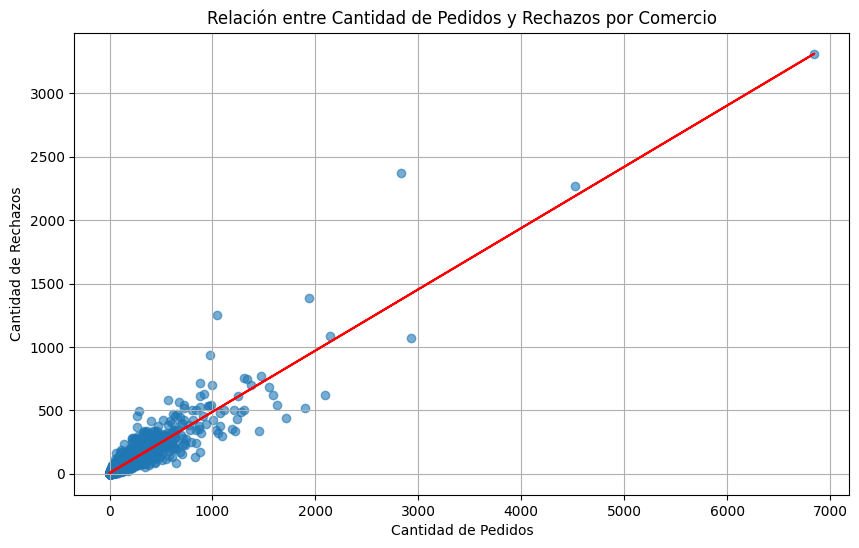

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calcular la cantidad de pedidos únicos por comercio
pedidos_por_comercio = df.groupby('id_comercio')['id_pedido'].nunique().reset_index(name='cantidad_pedidos')

# Contar la cantidad de rechazos por comercio
rechazos_por_comercio = df[df['rechazo'] == 1].groupby('id_comercio').size().reset_index(name='cantidad_rechazos')

# Unir la tabla de rechazos por comercio y la de pedidos únicos por comercio
pedidos_rechazos_comercio = pd.merge(rechazos_por_comercio, pedidos_por_comercio, on='id_comercio', how='outer').fillna(0)

# Crear gráfico de dispersión para comparar la cantidad de rechazos y la cantidad de pedidos por restaurante
plt.figure(figsize=(10, 6))
plt.scatter(pedidos_rechazos_comercio['cantidad_pedidos'], pedidos_rechazos_comercio['cantidad_rechazos'], alpha=0.6)

# Ajustar una línea de regresión lineal
x = pedidos_rechazos_comercio['cantidad_pedidos']
y = pedidos_rechazos_comercio['cantidad_rechazos']
m, b = np.polyfit(x, y, 1)  # m es la pendiente, b es la intersección

# Graficar la línea de regresión
plt.plot(x, m*x + b, color='red')

plt.title('Relación entre Cantidad de Pedidos y Rechazos por Comercio')
plt.xlabel('Cantidad de Pedidos')
plt.ylabel('Cantidad de Rechazos')
plt.grid(True)
plt.show()


In [69]:
import pandas as pd

# Calcular la cantidad de pedidos únicos por comercio
pedidos_por_comercio = df.groupby('id_comercio')['id_pedido'].nunique().reset_index(name='cantidad_pedidos')

# Contar la cantidad de rechazos por comercio
rechazos_por_comercio = df[df['rechazo'] == 1].groupby('id_comercio').size().reset_index(name='cantidad_rechazos')

# Unir la tabla de rechazos por comercio y la de pedidos únicos por comercio
pedidos_rechazos_comercio = pd.merge(rechazos_por_comercio, pedidos_por_comercio, on='id_comercio', how='outer').fillna(0)

# Calcular el coeficiente de correlación de Pearson entre la cantidad de pedidos y la cantidad de rechazos
coeficiente_pearson = pedidos_rechazos_comercio['cantidad_pedidos'].corr(pedidos_rechazos_comercio['cantidad_rechazos'], method='pearson')

# Imprimir el coeficiente de Pearson r
print(f"El coeficiente de Pearson r es: {coeficiente_pearson}")


El coeficiente de Pearson r es: 0.9316729101591155


#### Análisis de repartidores

Coeficiente de correlación (r): 0.0413


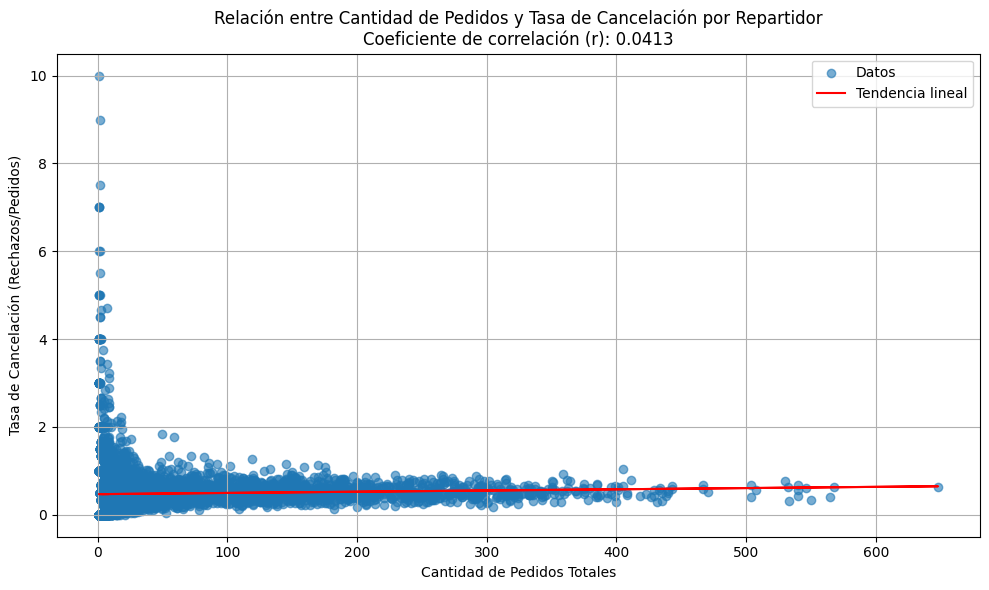

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Agrupar los datos por repartidor para contar la cantidad de pedidos totales y rechazos
repartidor_pedidos = df.groupby('id_repartidor_x')['id_pedido'].nunique().reset_index(name='cantidad_pedidos')
repartidor_rechazos = df[df['rechazo'] == 1].groupby('id_repartidor_x').size().reset_index(name='cantidad_rechazos')

# Unir los datos de cantidad de pedidos y rechazos
repartidor_stats = pd.merge(repartidor_pedidos, repartidor_rechazos, on='id_repartidor_x', how='left').fillna(0)

# Calcular la tasa de cancelación/rechazo (rechazos / pedidos)
repartidor_stats['tasa_cancelacion'] = repartidor_stats['cantidad_rechazos'] / repartidor_stats['cantidad_pedidos']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(repartidor_stats['cantidad_pedidos'], repartidor_stats['tasa_cancelacion'], alpha=0.6, label='Datos')

# Ajustar una línea de tendencia lineal
m, b = np.polyfit(repartidor_stats['cantidad_pedidos'], repartidor_stats['tasa_cancelacion'], 1)
plt.plot(repartidor_stats['cantidad_pedidos'], m*repartidor_stats['cantidad_pedidos'] + b, color='red', label='Tendencia lineal')

# Calcular el coeficiente de correlación de Pearson (r)
r, _ = pearsonr(repartidor_stats['cantidad_pedidos'], repartidor_stats['tasa_cancelacion'])
print(f"Coeficiente de correlación (r): {r:.4f}")

# Configuración del gráfico
plt.title(f'Relación entre Cantidad de Pedidos y Tasa de Cancelación por Repartidor\nCoeficiente de correlación (r): {r:.4f}')
plt.xlabel('Cantidad de Pedidos Totales')
plt.ylabel('Tasa de Cancelación (Rechazos/Pedidos)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


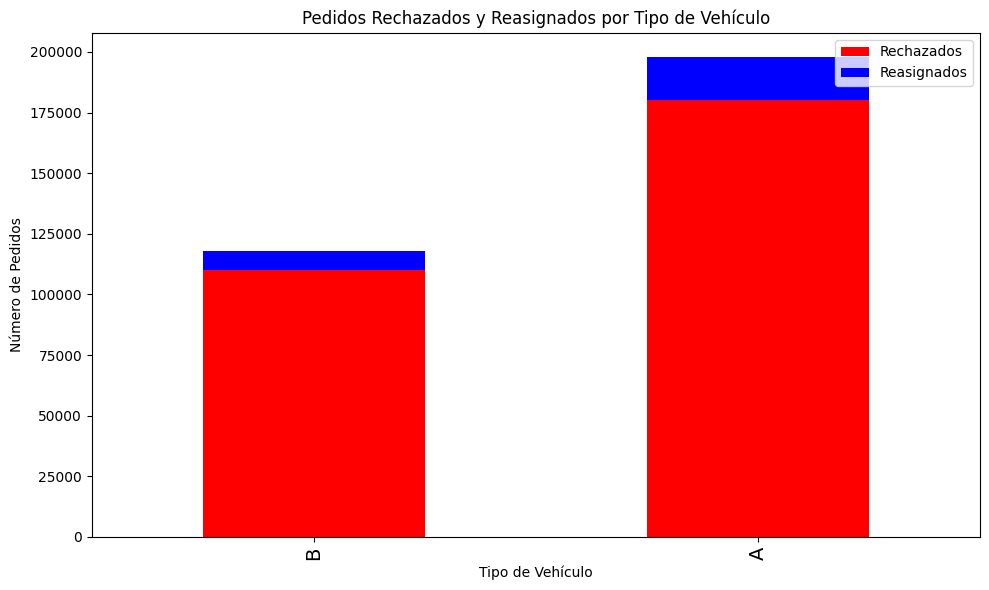

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumamos que el DataFrame df tiene las siguientes columnas:
# 'vehiculo' (tipo de vehículo: A o B), 'rechazo' (1 si fue rechazado, 0 si no), y 'reasignado' (1 si fue reasignado, 0 si no)

# Crear un DataFrame de ejemplo (ajustalo según tus datos)
data = {'vehiculo': ['A', 'A', 'B', 'B'],
        'rechazados': [50000, 60000, 80000, 100000], 
        'reasignados': [5000, 3000, 10000, 8000]}
df = pd.DataFrame(data)

# Agrupar por tipo de vehículo y contar el número de rechazos y reasignados
agrupado = df.groupby('vehiculo').sum()[['rechazados', 'reasignados']]

# Crear gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))

# Etiquetas y título del gráfico
plt.title('Pedidos Rechazados y Reasignados por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Pedidos')

# Ajustar nombres de las categorías de vehículo
plt.xticks(ticks=[0, 1], labels=['B', 'A'], fontsize=14)

# Leyenda
plt.legend(['Rechazados', 'Reasignados'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Correlaciones

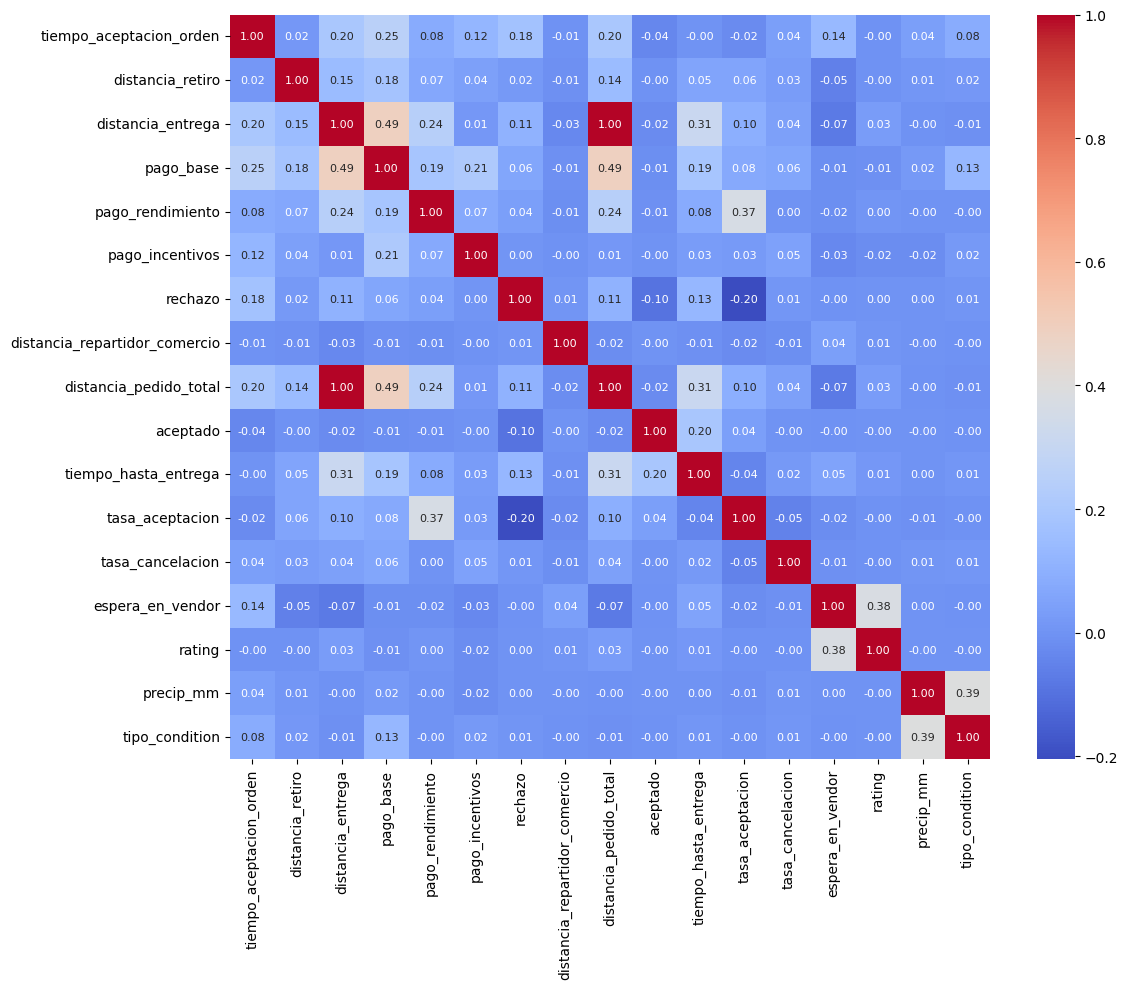

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de las columnas numéricas de interés
columnas_interes = ['tiempo_aceptacion_orden', 'distancia_retiro', 
                    'distancia_entrega', 'pago_base', 'pago_rendimiento', 'pago_incentivos', 'rechazo', 
                    'distancia_repartidor_comercio', 'distancia_pedido_total', 'aceptado', 
                    'tiempo_hasta_entrega', 'tasa_aceptacion', 'tasa_cancelacion', 
                    'espera_en_vendor', 'rating', 'precip_mm', 'tipo_condition']

# Filtrar las columnas numéricas de interés
df_numerico = df[columnas_interes]

# Calcular la matriz de correlación
corr = df_numerico.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Graficar el mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})

# Mostrar el gráfico
plt.tight_layout()
plt.show()
